<a href="https://colab.research.google.com/github/Nithinkondabathini/ADMLAB/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

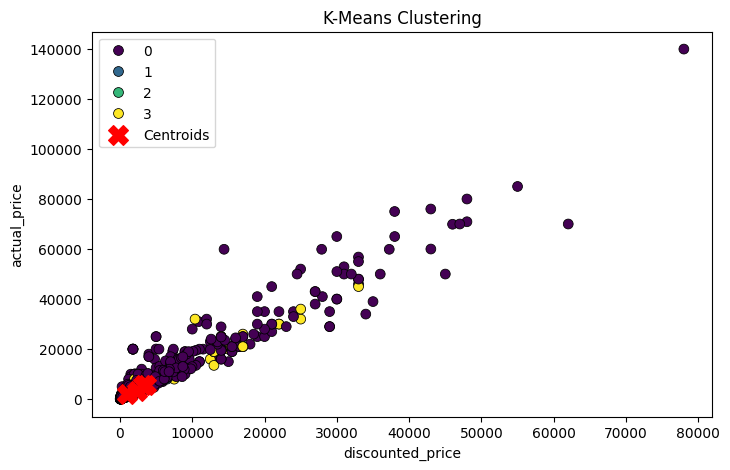

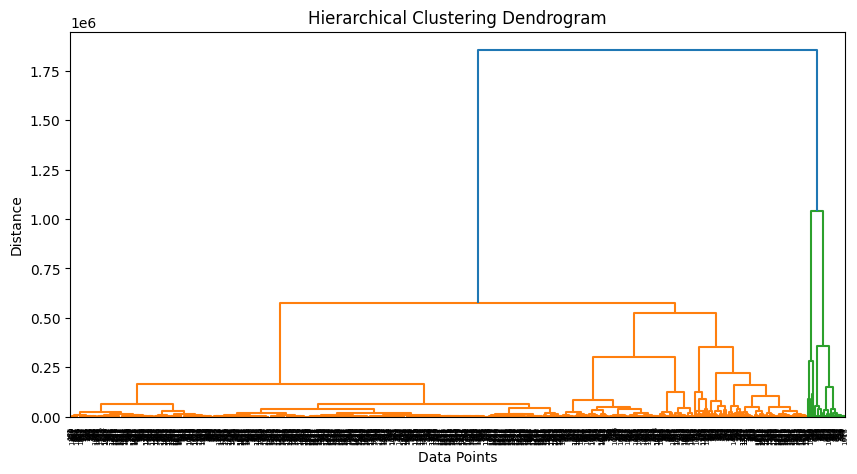

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import re

data = pd.read_csv('/content/amazon.csv')

def clean_numeric(column):
    return pd.to_numeric(column.replace(r'[^0-9.]', '', regex=True), errors='coerce')

numeric_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
for col in numeric_columns:
    if col in data.columns:
        data[col] = clean_numeric(data[col])

X = data[numeric_columns].dropna()

if X.shape[1] < 2:
    raise ValueError("Dataset must contain at least two numerical columns for clustering.")

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette='viridis', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
